<div align="center">
<img alt="if" height="200" style="border-radius:55px;" src=https://www.ifpb.edu.br/imagens/logotipos/ifpb-1>

# **Estatística Aplicada à Computação**

**CURSO BACHARELADO EM ENGENHARIA DE COMPUTAÇÃO**

**PROFESSOR:** *PAULO RIBEIRO LINS JUNIOR*

**ALUNO:** *Ynnayron Juan Lopes da Silva*

# **Projeto II**

### **Análise de Atividades Policiais em Rhode Island**

In [1]:
#Bibliotecas Usadas no Projeto
import pandas as pd
import numpy as np
import matplotlib as plt

--------------------------

### **1° Preparação dos dados para a análise**

**A) Importe o dataset police.csv, e indique quantas variáveis estão disponíveis e quantos registros policiais estão catalogados;**

In [3]:
police = pd.read_csv("police.csv")
police.head(3)

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


In [4]:
quantVar = len(police.columns)
quantVarNonNull = len(police.dropna(axis= 1, how='all').columns)
print(f"NESTE DATAFRAME TEMOS {quantVar} VARIAVEIS, NO ENTANTO, APENAS {quantVarNonNull} DELAS ESTÃO CATALOGADAS")



NESTE DATAFRAME TEMOS 15 VARIAVEIS, NO ENTANTO, APENAS 14 DELAS ESTÃO CATALOGADAS


**B) Conte o número de dados faltosos de cada variável;**

In [9]:
df=police.isnull().sum()
dtf=pd.DataFrame(df).rename(columns={0: 'Dados Faltosos'})
dtf

,Dados Faltosos
state,0
stop_date,0
stop_time,0
county_name,91741
driver_gender,5205
driver_race,5202
violation_raw,5202
violation,5202
search_conducted,0
search_type,88434


**C) Como estamos trabalhando somente com dados de um único estado, não faz sentido
mantermos informações de variáveis como county_name e state. Exclua essas variáveis
do conjunto;**

In [152]:
police.drop(['state', 'county_name'], axis= 'columns', inplace= True)
police.head(3)

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


Removi essas Variaveis Usando a Função ".drop" e indicando quais colunas eu desejo apagar

**D) Durante as análises, a coluna driver_gender será crítica para muitas de suas análises.
Como apenas uma pequena fração das linhas está faltando driver_gender, remova
essas linhas do conjunto de dados;**

In [10]:
police.dropna(axis= 0, how= 'any', inplace=True, subset= ['driver_gender'])
police['driver_gender'].isna().sum()

0

**E)Vá na descrição dos dados e verifique que tipo de variável são search_conducted, is_arrested e district; depois compare com os tipos de dados que estão armazenados no conjunto de dados. Havendo necessidade, faça a modificação dos tipos de dados
para essas variáveis;**

In [154]:
police.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86536 entries, 0 to 91740
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   stop_date           86536 non-null  object
 1   stop_time           86536 non-null  object
 2   driver_gender       86536 non-null  object
 3   driver_race         86536 non-null  object
 4   violation_raw       86536 non-null  object
 5   violation           86536 non-null  object
 6   search_conducted    86536 non-null  bool  
 7   search_type         3307 non-null   object
 8   stop_outcome        86536 non-null  object
 9   is_arrested         86536 non-null  object
 10  stop_duration       86536 non-null  object
 11  drugs_related_stop  86536 non-null  bool  
 12  district            86536 non-null  object
dtypes: bool(2), object(11)
memory usage: 8.1+ MB


Essas Variaveis são do tipo boleano ou seja elas retornam apenas verdadeiro ou falso sendo um variaveis quantitativa 

**F) A data e a hora de cada parada de tráfego estão armazenadas em colunas separadas:
stop_date e stop_time. Combine essas duas colunas em uma única coluna, nomeandoa como stop_datetime e converta no formato data e hora (tipo datetime). Isso habilitará atributos baseados em data convenientes que usaremos posteriormente no projeto;**

In [15]:
df= police['stop_datetime'] = police['stop_date'] + " " + police['stop_time']
df= police['stop_datetime'] = pd.to_datetime(police['stop_datetime'])
dft=pd.DataFrame(df)
dft

,stop_datetime
0,2005-01-04 12:55:00
1,2005-01-23 23:15:00
2,2005-02-17 04:15:00
3,2005-02-20 17:15:00
4,2005-02-24 01:20:00
...,...
91736,2015-12-31 21:21:00
91737,2015-12-31 21:59:00
91738,2015-12-31 22:04:00
91739,2015-12-31 22:09:00


**G) Por fim, transforme a coluna stop_datetime no índice do dataframe.**

In [16]:
cpyDate = police['stop_datetime']
police.set_index('stop_datetime', inplace= True)
police.head(3)

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,
2005-01-04 12:55:00,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


--------------------------

### **2. Análise do gênero sobre as infrações**

In [19]:
def relativeFrequency(absoluteFrequency : np.ndarray) -> np.ndarray:
    """retorna a frequencia relativa

    Args:
        absoluteFrequency (np.ndarray): frequencia absoluta

    Returns:
        np.ndarray: array com a frequencia relativa
    """
    return np.around(absoluteFrequency/absoluteFrequency.sum()*100, decimals = 2)


def tableAndGraficQuality(column: str, dataframe: pd.DataFrame) -> pd.DataFrame:
    """Funcao responsavel por automatizar a formacao de tabela qualitativas

    Args:
        column (str): nome da coluna do df
        dataframe (pd.DataFrame): dataframe com os dados usados
    """

    # informacao da coluna em questao
    List = dataframe[column]

    # frequencia absoluta
    absoluteFrequency = List.value_counts()
    # frequencia relativa
    relativeFrequencyVar = relativeFrequency(absoluteFrequency)

    # tabela
    table = pd.DataFrame({column.capitalize(): absoluteFrequency.keys(), "Frequancia absoluta": absoluteFrequency, "Frequencia relativa %": relativeFrequencyVar}).set_index(column.capitalize())

    # plotagem da tabela e do grafico
    display(table)
    return table
    # table.plot(kind = "barh", subplots = True, sharex = False, title = "Frequencias", legend = False, figsize = (7.5,7.5))


def tableAndGraficQuantity(column: str, dataframe: pd.DataFrame,  relativeFrequencyOpt: bool = True, binsVar: int = 5) -> None:
    """ Funcao responsavel por montar graficos e tabelas de variaveis quantitativas, ou qualitativas ordinais

    Args:
        column (str): nome da coluna usada se o dado inserido for um df
        dataframe (pd.DataFrame): estrutura de dados usada na analise
        relativeFrequencyOpt (bool, optional): caso voce queira a frequancia relativa. Padrao para True.
        binsVar (int, optional): quantidade de itens que voce quer na distribuicao de frequencias. Padrao para 5.
    """

    # se a estrutura inserida for um df...
    if type(dataframe) == pd.DataFrame:
        # a coluna em questao eh chamada
        List = dataframe[column]
    # caso contrario...
    else:
        # a propria estrutura eh usada
        # pois, como nao ha colunas a serem chamadas
        # presume-se que os dados ja estao disponiveis 
        List = dataframe

    # distribuicao de frequencias
    absoluteFrequency, tableClass = np.histogram(List, bins= binsVar)

    # lista vazia com as classes organizadas em strings
    # # exemplo -> classe 1 |-- classe 2
    listTableClass = []

    # iteracao necessaria para montar as strings de cada classe
    for i in range(len(tableClass)):
        # condicional que verifica o limite da lista
        # se i estiver numa posicao alem da penultima
        # o codigo plota um IndexError
        if i<=len(tableClass)-2:
            listTableClass.append('{:.2f} |-- {:2.2f}' .format(tableClass[i], tableClass[i+1]))
        # se i estiver na ultima posicao...
        else:
            # o laco eh quebrado
            break

    # formacao da tabela
    table = pd.DataFrame({'Classes': listTableClass, 
                        'Frequencia absoluta': absoluteFrequency,
                        }).set_index("Classes")

    # se a frequencia relativa for pedida...
    if relativeFrequencyOpt == True:
        # ela eh calculada...
        relativeFrequencyVar = relativeFrequency(absoluteFrequency)

        # e inserida na tabela de frequencias
        table['Frequencia relativa %'] = relativeFrequencyVar

    # plotagem da tabela e do grafico
    display(table)
    table.plot(kind = "barh", subplots = True, sharex = False, title = "Frequencias", legend = False, figsize = (7.5,7.5))

**A) Antes de comparar as infrações cometidas por cada gênero, você deve examinar as infrações cometidas por todos os motoristas para obter uma compreensão básica dos dados.
Construa uma distribuição de frequências da variável violation e responda: qual a
infração mais comum e a menos notificada?**


In [22]:
table1 = tableAndGraficQuality('violation', police)
indexes = list(table1.index)

print(f"A INFRAÇÃO MAIS COMUM E A  '{indexes[0]}' eE A MENOS REPORTADA E '{indexes[-1]}'")

,Frequancia absoluta,Frequencia relativa %
Violation,,
Speeding,48423,55.96
Moving violation,16224,18.75
Equipment,10921,12.62
Other,4409,5.09
Registration/plates,3703,4.28
Seat belt,2856,3.30


A INFRAÇÃO MAIS COMUM E A  'Speeding' eE A MENOS REPORTADA E 'Seat belt'


**B) O interesse agora é responder a seguinte questão: motoristas do sexo masculino e feminino tendem a cometer diferentes tipos de infrações de trânsito? Para isso, crie uma tabela
de contingência para frequência absoluta e outra para frequência relativa, contendo a
distribuição conjunta das variáveis driver_gender e violation**

In [159]:
pd.options.display.float_format = '{:,.2f}'.format

tableInt = pd.crosstab(police['violation'], police['driver_gender'], margins= True, rownames= [''])
tableFloat = pd.crosstab(police['violation'], police['driver_gender'], margins= True, rownames= [''], normalize=True) * 100

tableInt.columns = ['Feminino', 'Masculino', 'Total']
tableFloat.columns = ['Feminino %', 'Masculino %', 'Total %']

display(tableInt)
tableFloat

,Feminino,Masculino,Total
,,,
Equipment,2501,8420,10921
Moving violation,3286,12938,16224
Other,707,3702,4409
Registration/plates,1056,2647,3703
Seat belt,578,2278,2856
Speeding,15646,32777,48423
All,23774,62762,86536


,Feminino %,Masculino %,Total %
,,,
Equipment,2.89,9.73,12.62
Moving violation,3.80,14.95,18.75
Other,0.82,4.28,5.09
Registration/plates,1.22,3.06,4.28
Seat belt,0.67,2.63,3.30
Speeding,18.08,37.88,55.96
All,27.47,72.53,100.00


**C) Construa um gráfico de barras agrupadas para ilustrar os dados das tabelas de contingência construídas;**

<AxesSubplot:>

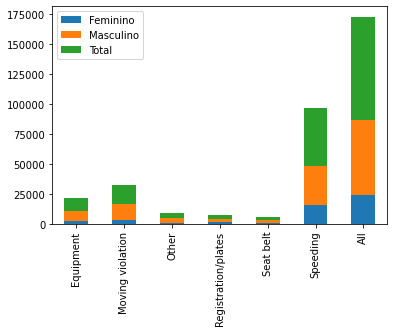

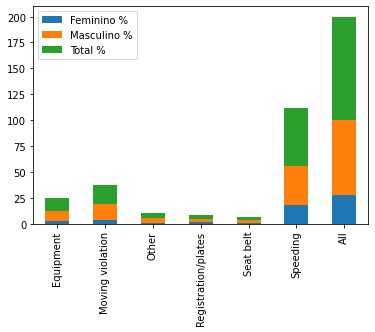

In [160]:
tableInt.plot.bar(stacked = True)
tableFloat.plot.bar(stacked = True)

**D) Quando um motorista é parado por excesso de velocidade, muitas pessoas acreditam que
o gênero influencia se o motorista receberá uma multa ou um aviso. Você pode encontrar
evidências disso no conjunto de dados? Para tentar responder essa pergunta, crie uma
tabela de contingência considerando as variáveis driver_gender e stop_outcome e
então vai comparar a porcentagem de paradas resultados de uma "Citation"versus um
"Warning"**

In [23]:
tableStopGeneral = pd.crosstab(police['driver_gender'], police['stop_outcome'], normalize= True, margins=True)
tableStop = tableStopGeneral[['Warning', 'Citation']]
tableStop.columns = ['Alertas %', 'Citacoes %']
display(tableStop)


,Alertas %,Citacoes %
driver_gender,,
F,0.017160,0.245574
M,0.042191,0.645281
All,0.059351,0.890855


#### Segundo as leis norte americanas, "Citations" sao mais graves do que "Warnings". Logo, essa tabela mostra que homens recebem mais intervencoes do que mulheres,isso geralmente deve ser causado pela irresponsabilidade que muitos homens tem no transito ,  no entanto, isso nao significa, diretamente, que mulheres dirigem melhor.

 **G) Considere agora a hipótese de que a taxa de revista varia de acordo com o tipo de infração, e a diferença na taxa de revista entre homens e mulheres é porque eles tendem a
cometer infrações diferentes. Calcule a taxa de infração para cada combinação de gênero
e infração. Homens e mulheres são revistados com a mesma taxa para cada infração?**

,Equipment %,Moving violation %,Other %,Registration/plates %,Seat belt %,Speeding %,Total %
Sexo,,,,,,,
F,2.890127,3.797264,0.817001,1.220301,0.667930,18.080337,27.472959
M,9.730055,14.951003,4.277988,3.058843,2.632430,37.876722,72.527041
Total,12.620181,18.748267,5.094989,4.279144,3.300361,55.957058,100.000000


<AxesSubplot:xlabel='Sexo'>

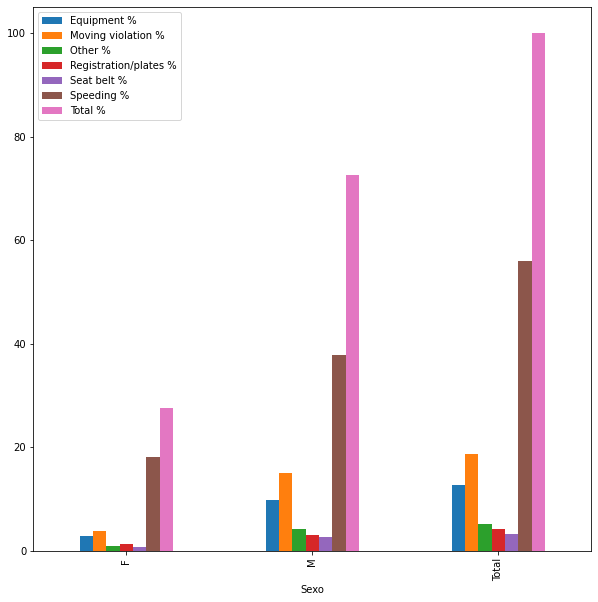

In [24]:
tableLetterG = pd.crosstab(police['driver_gender'], police['violation'], margins= True, margins_name='Total', normalize= True, rownames=["Sexo"])*100
newColumns = []
for i in list(tableLetterG.columns):
    newColumns.append(i + " %")

tableLetterG.columns = newColumns
display(tableLetterG)
tableLetterG.plot.bar(figsize = (10, 10))


### Ao analisar a tabela e o gráfico a baixo, é possível perceber que os homens são mais parados do que as mulheres

--------------------------

### **3. Análise exploratória visual dos dados**

**A) Quando um policial para um motorista, uma pequena porcentagem dessas paradas termina em uma prisão. Isso é conhecido como taxa de prisão. Você descobrirá se a taxa de
prisão varia de acordo com a hora do dia. Primeiro, você calculará a taxa de prisão em
todas as paradas no DataFrame, calculando a média da coluna is_arrested ;**

In [29]:
meanDf = police['is_arrested'].mean()
meanDf

0.0355690117407784

**B) Em seguida, você calculará a taxa de prisão por hora usando o atributo de hora do índice.
A hora varia de 0 a 23, considerando que 0 é meia noite e 12h é meio dia. Para isso,
agrupe (usando groupby) pelo atributo de hora do índice do DataFrame, calculando a
média dos valores agrupados. No final crie uma nova variável hourly_arrest_rate
com os valores encontrados da taxa de prisão por hora;**

In [30]:
hourly_arrest_rate = police.groupby(by=lambda x: x.hour)['is_arrested']

hourly_arrest_rate = pd.DataFrame(hourly_arrest_rate.mean())

hourly_arrest_rate.rename({"stop_datetime": "Horas"}, inplace = True)
hourly_arrest_rate.rename({"is_arrested": "Prisões"}, axis= 'columns', inplace = True)

hourly_arrest_rate

,Prisões
stop_datetime,
0,0.051431
1,0.064932
2,0.060798
3,0.060549
4,0.048000
5,0.042781
6,0.013813
7,0.013032
8,0.021854


**C) Agora crie um gráfico de linha mostrando a variável hourly_arrest_rate, colocando
o rótulo Horas no eixo-x, e Taxa de Prisões, no eixo-y, e o título de Taxa de Prisões por Hora
do Dia;**

<AxesSubplot:xlabel='Horas', ylabel=' Taxa de Prisões por Hora do Dia'>

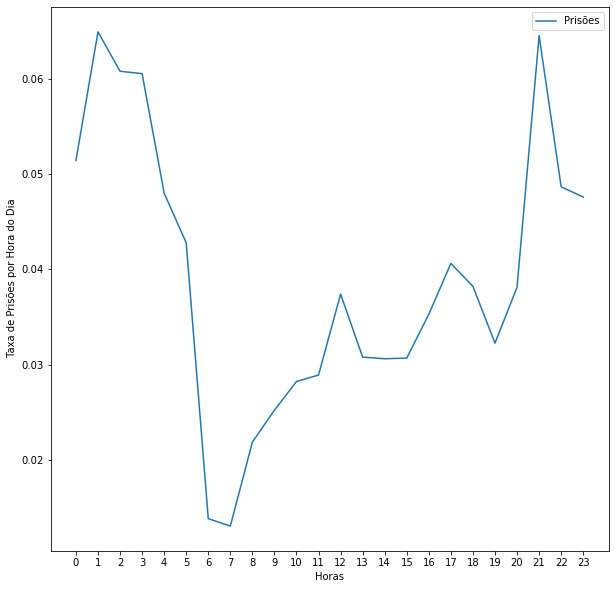

In [166]:
hourly_arrest_rate.plot(xticks = range(0, 24), figsize = (10,10), xlabel = "Horas", ylabel = " Taxa de Prisões por Hora do Dia")

**D) Em uma pequena parte das paradas de trânsito, drogas são encontradas no veículo durante uma busca. Agora, você avaliará se essas interrupções relacionadas à drogas estão
se tornando mais comuns com o tempo. A coluna booleana drug_related_stop indica
se drogas foram encontradas durante uma determinada parada. Você calculará a taxa
anual de drogas reamostrando essa coluna e, em seguida, usará um gráfico de linha para
visualizar como a taxa mudou ao longo do tempo;**

stop_datetime
2005     16
2006     73
2007     72
2008     62
2009     71
2010     72
2011     75
2012    103
2013     99
2014    120
2015     99
Name: drugs_related_stop, dtype: int64

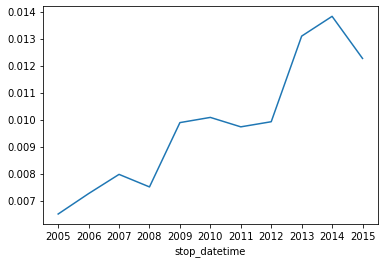

In [32]:
drugStop = police.groupby(by=lambda x: x.year)['drugs_related_stop'].mean()
indx = list(drugStop.keys())
drugStop.plot(xticks = range(indx[0], indx[-1]+1))
display(police.groupby(by=lambda x: x.year)['drugs_related_stop'].sum())


**E) Ainda falando sobre drogas, consideremos a hipótese de que, o aumento ou a diminuição das apreensões de drogas estão associadas ao aumento ou diminuição das abordagens políciais, ou seja, mais abordagens, geram mais apreensões e menos abordagens, menos apreensões de drogas. Podemos testar essa hipótese calculando a taxa de
abordagens anual e, em seguida, comparando-a com a taxa anual de medicamentos.
Se a hipótese for verdadeira, você verá que ambas as taxas aumentam com o tempo.
Para isso, calcule a taxa de pesquisa anual reamostrando a coluna search_conducted
e salve o resultado como Annual_search_rate. Concatene Annual_drug_rate e
Annual_search_rate ao longo do eixo das colunas e gere gráficos de linha para os
dados desse resultado da concatenação;**

<AxesSubplot:xlabel='stop_datetime'>

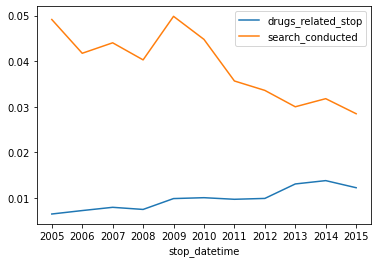

In [31]:
Annual_search_rate = police[['drugs_related_stop', 'search_conducted']].groupby(by=lambda x: x.year).mean()
Annual_search_rate.plot(xticks = range(2005,2016))


### podemos analizar que a queda na taxa de condução anual não está relacionada com a incidência de drogas achadas em veículos, pois,enquanto "drugs_related_stop" cresce "search_conducted" diminui

**F) O estado de Rhode Island está dividido em seis distritos policiais, também conhecidos
como zonas. Como as zonas se comparam em termos de quais infrações são detectadas
pela polícia? Para isso, crie uma distribuição conjunta entre as variáveis district e
violation, usando uma tabela de contingência. Depois, selecione as linhas das zonas
’Zona K1’ a ’Zona K3’, gere um gráfico de barras agrupadas que ilustre os resultados
obtido na tabela, e responda a questão colocada**

Não podemos afirmar que a zona K1 é menor que K3.
No entanto, a primeira registra bem menos violações, principalmente, quando se trata de cinto de segurança.


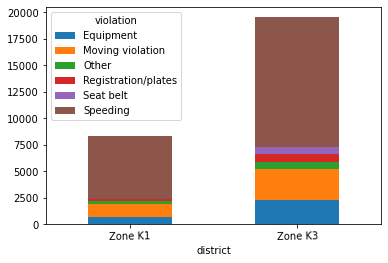

In [169]:
districtViolation = pd.crosstab(police['district'],police['violation'])

districtViolation.loc[['Zone K1', 'Zone K3']].plot.bar(stacked = True, rot = True)


### Não podemos afirmar que a zona K1 é menor que K3.No entanto, a primeira registra bem menos violações, principalmente, quando se trata de cinto de segurança.

--------------------------

### **4. Analisando o efeito do clima no policiamento**

In [34]:
weather = pd.read_csv("weather.csv")

**A) Comece explorando as temperaturas apresentadas no conjunto de dados: carregue o conjunto, selecione as variáveis relativas à temperatura (TMIN, TAVG, TMAX), imprima as
principais medidas resumo usando o comando describe e plote os três boxplots dessas
variáveis em um mesmo gráfico. O que você poderia comentar sobre as temperaturas, com
base nos resultados obtidos? PS.: ao decidir se os valores parecem razoáveis, lembre-se
de que a temperatura é medida em graus Fahrenheit, não Celsius!**

,TMIN,TAVG,TMAX
count,4017.000000,1217.000000,4017.000000
mean,43.484441,52.493016,61.268608
std,17.020298,17.830714,18.199517
min,-5.000000,6.000000,15.000000
25%,30.000000,39.000000,47.000000
50%,44.000000,54.000000,62.000000
75%,58.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


,TMIN,TAVG,TMAX
0,35,44.0,53
1,28,36.0,44
2,44,49.0,53
3,39,42.0,45
4,28,36.0,43
...,...,...,...
4012,44,51.0,61
4013,30,40.0,44
4014,28,33.0,40
4015,27,30.0,35


<AxesSubplot:>

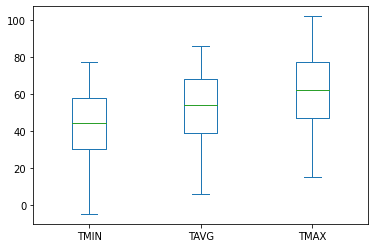

In [36]:
useWeather = weather[['TMIN', 'TAVG', 'TMAX']]


display(useWeather.describe())
display(useWeather)

useWeather.plot.box()

### Ao analisar a descrição, podemos ver que o local, cujo os dados foram coletados, é relativamente frio, pois sua temperatura média é de F° 52,49 (cerca de C° 11,38)

**B) Para a variável TDIFF, que representa a diferença entre as temperaturas, apresente as
medidas resumo e plote um histograma para essa variável. O que pode dizer sobre a
distribuição de dados?**

<AxesSubplot:>

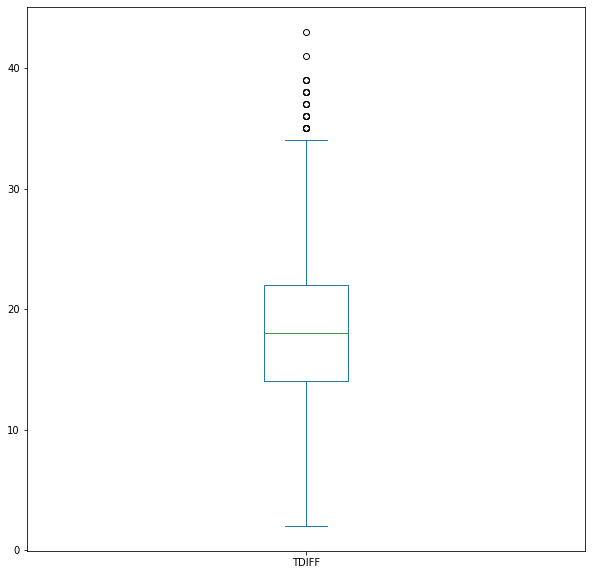

In [172]:
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']

weather['TDIFF'].plot.box(figsize = (10,10))